# Exploracion del Dataset s37.mat

In [ ]:
import h5py

ruta_archivo = 's37.mat'

with h5py.File(ruta_archivo, 'r') as f:
    print("📂 Exploración de archivo .mat\n")

    # Grupos
    grupos = ['#refs#', 'RSVP', 'senloc']
    for g in grupos:
        print(f"\n🔸 Grupo: '{g}'")
        grupo = f[g]
        subclaves = list(grupo.keys())
        print(f"  - Subclaves: {subclaves}")

    for clave in subclaves:
        valor = grupo[clave]
        try:
            valor = valor[()]
        except Exception:
            print("no")
            pass
        print(f"    🔹 {clave} → {valor}")


    # Datasets
    datasets = ['rest', 'test', 'train']
    for d in datasets:
        print(f"\n📊 Dataset: '{d}'")
        data = f[d]
        print(f"  - Forma: {data.shape}")
        print(f"  - Tipo de datos: {data.dtype}")


📂 Exploración de archivo .mat


🔸 Grupo: '#refs#'
  - Subclaves: ['0', '0A', '0B', '0C', '0D', '0E', '0F', '0G', '0H', '0I', '0J', '0K', '0L', '0M', '0N', '0b', '0c', '0d', '0e', '0f', '0g', '0h', '0i', '0j', '0k', '0l', '0m', '0n', '0o', '0p', '0q', '0r', '0s', '0t', '0u', '0v', '0w', '0x', '0y', '0z', '1', '1A', '1B', '1C', '1D', '1E', '1F', '1G', '1H', '1I', '1J', '1K', '1L', '1M', '1N', '1b', '1c', '1d', '1e', '1f', '1g', '1h', '1i', '1j', '1k', '1l', '1m', '1n', '1o', '1p', '1q', '1r', '1s', '1t', '1u', '1v', '1w', '1x', '1y', '1z', '2', '2A', '2B', '2C', '2D', '2E', '2F', '2G', '2H', '2I', '2J', '2K', '2L', '2M', '2N', '2b', '2c', '2d', '2e', '2f', '2g', '2h', '2i', '2j', '2k', '2l', '2m', '2n', '2o', '2p', '2q', '2r', '2s', '2t', '2u', '2v', '2w', '2x', '2y', '2z', '3', '3A', '3B', '3C', '3D', '3E', '3F', '3G', '3H', '3I', '3J', '3K', '3L', '3M', '3N', '3b', '3c', '3d', '3e', '3f', '3g', '3h', '3i', '3j', '3k', '3l', '3m', '3n', '3o', '3p', '3q', '3r', '3s', '3t', '3u', '3v', '3

In [ ]:
import numpy as np

ruta_archivo = 's37.mat'

with h5py.File(ruta_archivo, 'r') as f:
    print("Claves principales:")
    for key in f.keys():
        print("-", key)

Claves principales:
- #refs#
- RSVP
- rest
- senloc
- test
- train


# Visualizar como se comportan las ondas en las pruebas

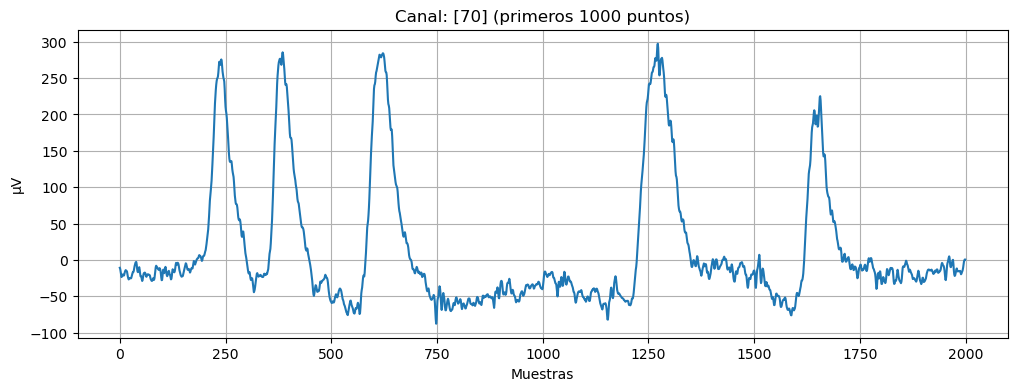

In [ ]:
import matplotlib.pyplot as plt

with h5py.File("s37.mat", "r") as f:
    eeg_data = f["RSVP/data"][:]
    markers = f["RSVP/markers_target"][:]
    labels = f["RSVP/target"][:]
    responses = f["RSVP/keyboard_response"][:]
    fs = f["RSVP/srate"][0][0]

    label_refs = f["RSVP/chanlocs/labels"][:]
    chan_labels = []

    for i in range(32):
        ref = label_refs[i][0]
        raw = f[ref][()]
        if isinstance(raw, np.ndarray):
            # Tomar el primer elemento del arreglo (bytes)
            raw = raw[0]
        if isinstance(raw, bytes):
            chan_labels.append(raw.decode().strip())
        else:
            chan_labels.append(str(raw).strip())



# Graficar canal 0
plt.figure(figsize=(12, 4))
plt.plot(eeg_data[:2000, 0])
plt.title(f"Canal: {chan_labels[0]} (primeros 1000 puntos)")
plt.xlabel("Muestras")
plt.ylabel("μV")
plt.grid(True)
plt.show()



# Visualizar información de cada electrodo

In [ ]:
import pandas as pd

def extract_from_ref(ref_array, file):
    """Extrae y decodifica una lista desde referencias HDF5."""
    result = []
    for i in range(len(ref_array)):
        ref = ref_array[i][0]
        val = file[ref][()]
        while isinstance(val, np.ndarray):
            val = val[0]
        # Si es tipo bytes, decodifica; si es numérico, lo convierte
        if isinstance(val, bytes):
            result.append(val.decode("utf-8").strip())
        else:
            result.append(float(val))  # para coordenadas
    return result

with h5py.File("s37.mat", "r") as f:
    # Extraer labels y coordenadas desde referencias
    label_refs = f["RSVP/chanlocs/labels"][:]
    x_refs = f["RSVP/chanlocs/X"][:]
    y_refs = f["RSVP/chanlocs/Y"][:]
    z_refs = f["RSVP/chanlocs/Z"][:]

    labels = extract_from_ref(label_refs, f)
    x = extract_from_ref(x_refs, f)
    y = extract_from_ref(y_refs, f)
    z = extract_from_ref(z_refs, f)

# Crear DataFrame
electrodos = pd.DataFrame({
    "Nombre": labels,
    "X": x,
    "Y": y,
    "Z": z
})

electrodos.head(100)


,Nombre,X,Y,Z
0,70.0,9.504772e-01,3.088287e-01,-0.034899
1,65.0,8.848461e-01,3.755949e-01,0.275637
2,70.0,5.874272e-01,8.085242e-01,-0.034899
3,70.0,6.730281e-01,5.450074e-01,0.500000
4,70.0,3.747095e-01,3.747095e-01,0.848048
5,70.0,3.388436e-01,8.827176e-01,0.325568
6,84.0,6.119504e-17,9.993908e-01,-0.034899
7,67.0,4.404686e-17,7.193398e-01,0.694658
8,67.0,-3.747095e-01,3.747095e-01,0.848048
9,67.0,-3.388436e-01,8.827176e-01,0.325568


# Visualizar a los electrodos en el plano

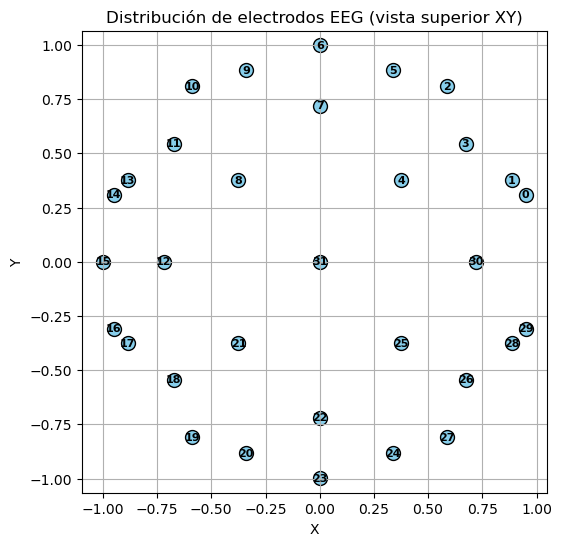

In [ ]:
x = electrodos["X"].astype(float).to_numpy()
y = electrodos["Y"].astype(float).to_numpy()

# Graficar los puntos
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=100, c='skyblue', edgecolor='k')

for i in range(len(x)):
    color = 'black'
    plt.text(x[i], y[i], str(i), ha='center', va='center', fontsize=8, color=color, fontweight='bold' )

plt.title("Distribución de electrodos EEG (vista superior XY)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)
plt.show()


# Nombres de los electrodos

In [ ]:
with h5py.File("s37.mat", "r") as f:
    senloc_labels_refs = f["senloc/labels"][:]
    nombres_electrodos = []
    for i in range(len(senloc_labels_refs)):
        ref = senloc_labels_refs[i][0]
        val = f[ref][()]
        while isinstance(val, np.ndarray):
            val = val[0]
        nombres_electrodos.append(val.decode().strip() if isinstance(val, bytes) else str(val).strip())

print(nombres_electrodos)


['76', '82', '78', '70', '65', '70', '70', '70', '70', '84', '67', '67', '67', '80', '80', '80', '80', '79', '79', '79', '80', '80', '80', '67', '67', '67', '84', '70', '70', '70', '70', '65', '70', '70', '67']


# Visualizar el comportamiento del resultado de cada electrodo durante 62 segundos, considerando los target como rojos, los non target como azules y la nada en blanco

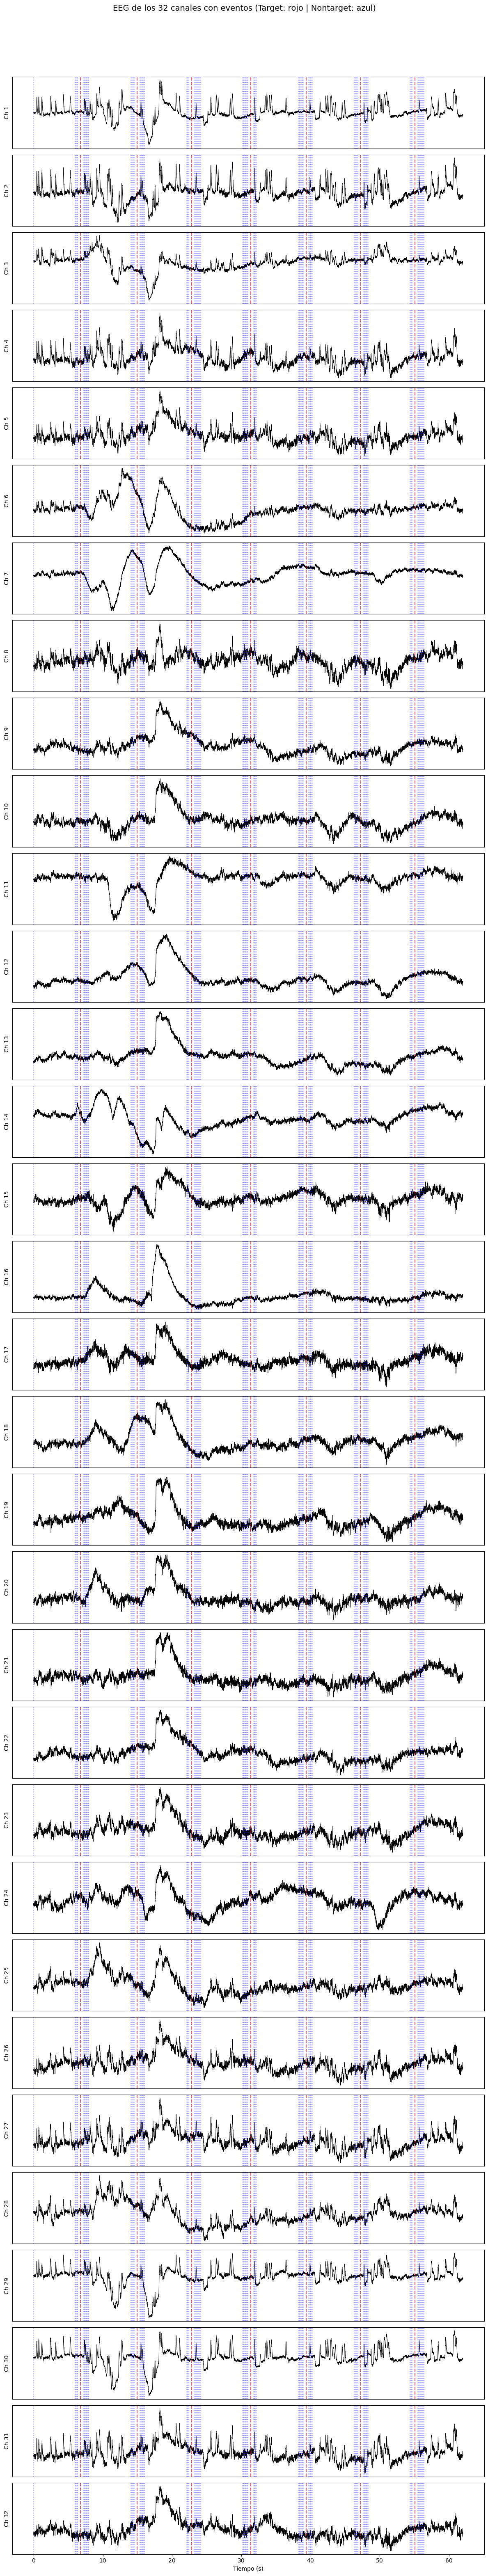

In [ ]:
duracion_seg = 62
fs = 512  # ya confirmado por protocolo
n_muestras = min(duracion_seg * fs, eeg_data.shape[0])
tiempo = np.arange(n_muestras) / fs

plt.figure(figsize=(12, 2 * eeg_data.shape[1]))

for i in range(eeg_data.shape[1]):
    plt.subplot(eeg_data.shape[1], 1, i + 1)
    plt.plot(tiempo, eeg_data[:n_muestras, i], color='black', linewidth=0.7)

    # Dibujar eventos
    for j in range(n_muestras):
        evento = markers[j, 0]
        if evento == 1:
            plt.axvline(x=j/fs, color='red', linestyle='--', alpha=0.6)
        elif evento == 0 and (j == 0 or markers[j-1, 0] != 0):
            plt.axvline(x=j/fs, color='blue', linestyle=':', alpha=0.3)

    plt.ylabel(f"Ch {i + 1}")
    if i < eeg_data.shape[1] - 1:
        plt.xticks([])
    else:
        plt.xlabel("Tiempo (s)")
    plt.yticks([])

plt.suptitle("EEG de los 32 canales con eventos (Target: rojo | Nontarget: azul)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Entrenamiento de un RandomForest para detectar que electrodos logran detectar patrones de intencion y reconocimiento.
## Tambien se verifican sus respectivas metricas

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Parámetros
fs = 512  # frecuencia de muestreo
ventana_seg = 0.8
ventana_muestras = int(fs * ventana_seg)

# Indices donde hay estímulos target
eventos = np.where(markers[:, 0] == 1)[0]
X, y = [], []

for idx in eventos:
    if idx + ventana_muestras < eeg_data.shape[0]:
        segmento = eeg_data[idx:idx + ventana_muestras, :]
        features = np.concatenate([
            np.mean(segmento, axis=0),
            np.std(segmento, axis=0),
            np.max(segmento, axis=0),
            np.sum(segmento**2, axis=0)
        ])
        X.append(features)
        y.append(1)
np.random.seed(42)
offset = fs
candidatos = np.setdiff1d(np.arange(offset, eeg_data.shape[0] - ventana_muestras), eventos)

negativos = []
while len(negativos) < len(eventos):
    idx = np.random.choice(candidatos)
    if np.all(markers[idx - 20:idx + ventana_muestras + 20, 0] != 1):
        segmento = eeg_data[idx:idx + ventana_muestras, :]
        features = np.concatenate([
            np.mean(segmento, axis=0),
            np.std(segmento, axis=0),
            np.max(segmento, axis=0),
            np.sum(segmento**2, axis=0)
        ])
        X.append(features)
        y.append(0)
        negativos.append(idx)

X = np.array(X)
y = np.array(y)

# Entrenar y evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Métricas
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

metrics_df = pd.DataFrame(report).T
conf_df = pd.DataFrame(conf_matrix, index=["Real 0", "Real 1"], columns=["Pred 0", "Pred 1"])

print(metrics_df)
conf_df


              precision    recall  f1-score    support
0              0.769231  0.909091  0.833333  11.000000
1              0.909091  0.769231  0.833333  13.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.839161  0.839161  0.833333  24.000000
weighted avg   0.844988  0.833333  0.833333  24.000000


,Pred 0,Pred 1
Real 0,10,1
Real 1,3,10


# Mostrar segun orden de importancia, muestra primero cuales son los que detectaron mejor la actividad

In [ ]:
importancias = clf.feature_importances_
importancia_por_canal = [np.sum(importancias[i::32]) for i in range(32)]

if "Nombre" in electrodos.columns:
    nombres_canales = electrodos["Nombre"].astype(str).tolist()
else:
    nombres_canales = [f"Ch{i+1}" for i in range(32)]

# Crear DataFrame con índice de canal 1–32
df_importancia = pd.DataFrame({
    "Canal (#)": list(range(1, 33)),
    "Etiqueta": nombres_canales,
    "Importancia": importancia_por_canal
}).sort_values(by="Importancia", ascending=False)

df_importancia

,Canal (#),Etiqueta,Importancia
29,30,70.0,0.113302
1,2,65.0,0.108563
0,1,70.0,0.087254
21,22,67.0,0.070091
2,3,70.0,0.059361
28,29,65.0,0.043705
30,31,70.0,0.043238
24,25,70.0,0.041334
15,16,79.0,0.039822
12,13,80.0,0.035842


# Asignacion del nombre para cada electrodo segun la información proveida en el articulo

In [ ]:
mapeo_index_nombre = {
     1:  'Fp1',   2:  'Fp2',
     3:  'AF3',   4:  'AF4',
     5:  'F7',    6:  'F3',
     7:  'Fz',    8:  'F4',
     9:  'F8',   10:  'FC5',
    11:  'FC1',  12:  'FC2',
    13:  'FC6',  14:  'T7',
    15:  'C3',   16:  'Cz',
    17:  'C4',   18:  'T8',
    19:  'CP5',  20:  'CP1',
    21:  'CP2',  22:  'CP6',
    23:  'P7',   24:  'P3',
    25:  'Pz',   26:  'P4',
    27:  'P8',   28:  'POz',
    29:  'O1',   30:  'Oz',
    31:  'O2',   32:  'PO3'
}

electrodos["Nombre_anatómico"] = [mapeo_index_nombre[i+1] for i in range(32)]

electrodos

,Nombre,X,Y,Z,Nombre_anatómico
0,70.0,9.504772e-01,3.088287e-01,-0.034899,Fp1
1,65.0,8.848461e-01,3.755949e-01,0.275637,Fp2
2,70.0,5.874272e-01,8.085242e-01,-0.034899,AF3
3,70.0,6.730281e-01,5.450074e-01,0.500000,AF4
4,70.0,3.747095e-01,3.747095e-01,0.848048,F7
5,70.0,3.388436e-01,8.827176e-01,0.325568,F3
6,84.0,6.119504e-17,9.993908e-01,-0.034899,Fz
7,67.0,4.404686e-17,7.193398e-01,0.694658,F4
8,67.0,-3.747095e-01,3.747095e-01,0.848048,F8
9,67.0,-3.388436e-01,8.827176e-01,0.325568,FC5


# Graficar los electrodos resaltando a los 2 con mayor importancia (Fp2 y Oz)

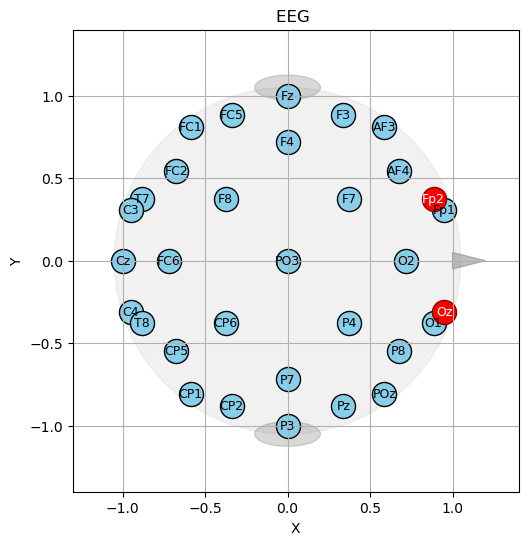

In [ ]:
from matplotlib.patches import Ellipse, Circle

fig, ax = plt.subplots(figsize=(6, 6))

# Cabeza (círculo grande)
cabeza = Circle((0, 0), 1.05, color='lightgray', alpha=0.3, zorder=0)
ax.add_patch(cabeza)

# Orejas horizontales pegadas a la cabeza
oreja_sup = Ellipse((0, 1.05), width=0.4, height=0.15, angle=0, color='gray', alpha=0.3, zorder=0)
oreja_inf = Ellipse((0, -1.05), width=0.4, height=0.15, angle=0, color='gray', alpha=0.3, zorder=0)
ax.add_patch(oreja_sup)
ax.add_patch(oreja_inf)

# Nariz
nariz_x = [1.2, 1, 1]
nariz_y = [0, -0.05, 0.05]
ax.fill(nariz_x, nariz_y, color='gray', alpha=0.5, zorder=0)

# Electrodos
for i in range(len(x)):
    color = 'red' if nombres_anat[i] in canales_rojos else 'skyblue'
    edge = 'darkred' if nombres_anat[i] in canales_rojos else 'k'
    ax.scatter(x[i], y[i], s=300, c=color, edgecolor=edge, zorder=1)
    ax.text(x[i], y[i], nombres_anat[i], ha='center', va='center', fontsize=9,
            color='white' if color == 'red' else 'black', zorder=2)

# Ajustes de gráfico
ax.set_title("EEG ")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
ax.set_xlim(-1.3, 1.4)
ax.set_ylim(-1.4, 1.4)
ax.grid(True)
plt.show()
